In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_lda = pd.read_csv('df_lda.csv')  
# combine lda matrix with other engineered features
df_selected = pd.read_csv('selected_data.csv')

In [4]:
df_lda

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,0.843240,0.000000,0.000000,0.0,0.129313,0.023743,0.000000,0.000000,0.000000,0.0,0.000000
1,1,0.461015,0.000000,0.238566,0.0,0.000000,0.038640,0.000000,0.260180,0.000000,0.0,0.000000
2,2,0.000000,0.390031,0.086231,0.0,0.019531,0.000000,0.000000,0.000000,0.500167,0.0,0.000000
3,3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.997938
4,4,0.000000,0.531466,0.000000,0.0,0.464855,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,0.000000,0.000000,0.000000,0.0,0.000000,0.520710,0.000000,0.000000,0.000000,0.0,0.476453
17876,17876,0.000000,0.118918,0.000000,0.0,0.820428,0.057140,0.000000,0.000000,0.000000,0.0,0.000000
17877,17877,0.000000,0.854610,0.000000,0.0,0.000000,0.000000,0.142097,0.000000,0.000000,0.0,0.000000
17878,17878,0.448880,0.000000,0.000000,0.0,0.000000,0.543173,0.000000,0.000000,0.000000,0.0,0.000000


In [5]:
df_lda = df_lda.drop(['Unnamed: 0'], axis=1)

In [6]:
df_lda

,0,1,2,3,4,5,6,7,8,9,10
0,0.843240,0.000000,0.000000,0.0,0.129313,0.023743,0.000000,0.000000,0.000000,0.0,0.000000
1,0.461015,0.000000,0.238566,0.0,0.000000,0.038640,0.000000,0.260180,0.000000,0.0,0.000000
2,0.000000,0.390031,0.086231,0.0,0.019531,0.000000,0.000000,0.000000,0.500167,0.0,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.997938
4,0.000000,0.531466,0.000000,0.0,0.464855,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17875,0.000000,0.000000,0.000000,0.0,0.000000,0.520710,0.000000,0.000000,0.000000,0.0,0.476453
17876,0.000000,0.118918,0.000000,0.0,0.820428,0.057140,0.000000,0.000000,0.000000,0.0,0.000000
17877,0.000000,0.854610,0.000000,0.0,0.000000,0.000000,0.142097,0.000000,0.000000,0.0,0.000000
17878,0.448880,0.000000,0.000000,0.0,0.000000,0.543173,0.000000,0.000000,0.000000,0.0,0.000000


In [7]:
df_all = pd.concat([df_selected,df_lda],axis = 1)

In [8]:
from sklearn.preprocessing import StandardScaler

#  Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your DataFrame
scaler.fit(df_all.drop('fraudulent',axis = 1).values)
X_scaled = scaler.transform(df_all.drop('fraudulent',axis = 1).values)
df_scaled = pd.DataFrame(X_scaled,columns = df_all.drop('fraudulent',axis = 1).columns)
df_scaled['fraudulent'] = df_all['fraudulent'].values

In [9]:
np.random.seed(26)
# Train_test
df_train = df_all.sample(frac = 0.75)
df_test = df_all.drop(df_train.index)

df_train['fraudulent'].value_counts()

0    12748
1      662
Name: fraudulent, dtype: int64

In [10]:
# oversample the training set to tackle the imbalance
def over_sample(data):
    #Make a balanced dataset by oversampling
    data_Fraud = data[data['fraudulent']==1]
    data_NonFraud =  data[data['fraudulent']==0]    
    df_fraud_example = pd.concat([data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                  data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                  data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                 data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                 data_Fraud, data_Fraud, data_Fraud], axis = 0)
    data_balanced = pd.concat([data_NonFraud, df_fraud_example], axis = 0)
    data_balanced = data_balanced.sample(frac=1).reset_index(drop=True)
    return data_balanced

df_train_bal = over_sample(df_train)
df_train_bal['fraudulent'].value_counts()

0    12748
1    12578
Name: fraudulent, dtype: int64

In [19]:
df_test['fraudulent'].value_counts()

0    4266
1     204
Name: fraudulent, dtype: int64

In [11]:
X_train = df_train_bal.drop(['fraudulent'], axis=1)
y_train = df_train_bal['fraudulent']

X_test = df_test.drop(['fraudulent'], axis=1)
y_test = df_test['fraudulent']

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [12]:
X_train.columns

Index(['company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'money_in_title',
       'money_in_desc', 'cons_punc_des', 'cons_punc_title',
       'low_required_education', 'has_short_company_profile',
       'has_short_requirements', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10'],
      dtype='object')

# Logistic Regression

Accuracy (overall correct predictions): 0.81
Auc: 0.89
Recall (all 1s predicted right): 0.8
Precision (confidence when predicting a 1): 0.82
Detail:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     12748
           1       0.82      0.80      0.81     12578

    accuracy                           0.81     25326
   macro avg       0.81      0.81      0.81     25326
weighted avg       0.81      0.81      0.81     25326

Accuracy (overall correct predictions): 0.82
Auc: 0.87
Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 0.17
Detail:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4266
           1       0.17      0.78      0.28       204

    accuracy                           0.82      4470
   macro avg       0.58      0.80      0.59      4470
weighted avg       0.95      0.82      0.87      4470



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


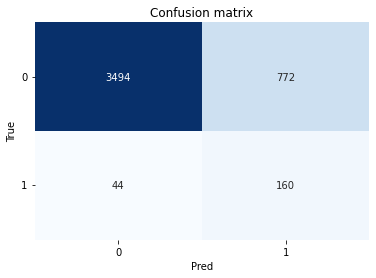

In [13]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# fit model
model.fit(X_train, y_train)

#train set prediction
predicted_prob = model.predict_proba(X_train)[:,1]
predicted = model.predict(X_train)
## Accuray e AUC
accuracy = metrics.accuracy_score(y_train, predicted)
auc = metrics.roc_auc_score(y_train, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
## Precision e Recall
recall = metrics.recall_score(y_train, predicted)
precision = metrics.precision_score(y_train, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_train, predicted, target_names=[str(i) for i in np.unique(y_test)]))

#test set prediction
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# Decision Tree

Accuracy (overall correct predictions): 0.95
Auc: 0.86
Recall (all 1s predicted right): 0.76
Precision (confidence when predicting a 1): 0.44
Detail:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4266
           1       0.44      0.76      0.56       204

    accuracy                           0.95      4470
   macro avg       0.72      0.86      0.77      4470
weighted avg       0.96      0.95      0.95      4470



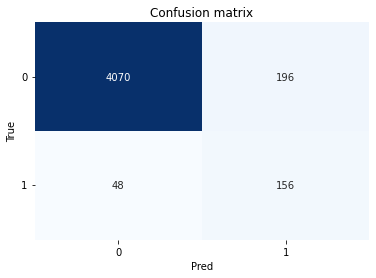

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=15, random_state=42)

model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# Random Forest

Accuracy (overall correct predictions): 0.98
Auc: 0.97
Recall (all 1s predicted right): 0.6
Precision (confidence when predicting a 1): 0.85
Detail:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4266
           1       0.85      0.60      0.70       204

    accuracy                           0.98      4470
   macro avg       0.91      0.80      0.84      4470
weighted avg       0.97      0.98      0.97      4470



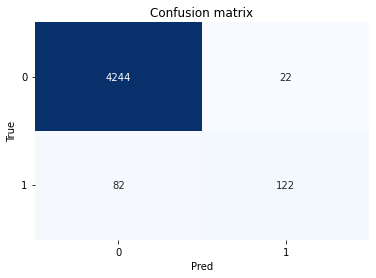

In [69]:
from sklearn.ensemble import RandomForestClassifier
## call model
rf = RandomForestClassifier(n_estimators = 50, random_state = 26)
# fit model
rf.fit(X_train, y_train)

predicted_prob = rf.predict_proba(X_test)[:,1]
rf_predicted = rf.predict(X_test)

## Accuray and AUC
accuracy = metrics.accuracy_score(y_test, rf_predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision and Recall
recall = metrics.recall_score(y_test, rf_predicted)
precision = metrics.precision_score(y_test, rf_predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, rf_predicted, target_names=[str(i) for i in np.unique(y_test)]))

import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, rf_predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# Boosted Gradient Descent

Accuracy (overall correct predictions): 1.0
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12748
           1       1.00      1.00      1.00     12578

    accuracy                           1.00     25326
   macro avg       1.00      1.00      1.00     25326
weighted avg       1.00      1.00      1.00     25326

Accuracy (overall correct predictions): 0.97
Auc: 0.97
Recall (all 1s predicted right): 0.73
Precision (confidence when predicting a 1): 0.7
Detail:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4266
           1       0.70      0.73      0.71       204

    accuracy                           0.97      4470
   macro avg       0.84      0.86      0.85      4470
weighted avg       0.97      0.97      0.97      4470



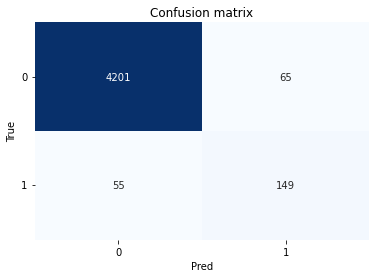

In [70]:
## call model
GB = ensemble.GradientBoostingClassifier(max_depth=10, random_state=26)
GB.fit(X_train, y_train)

#train set prediction
predicted_prob = GB.predict_proba(X_train)[:,1]
predicted = GB.predict(X_train)
## Accuray e AUC
accuracy = metrics.accuracy_score(y_train, predicted)
auc = metrics.roc_auc_score(y_train, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
## Precision e Recall
recall = metrics.recall_score(y_train, predicted)
precision = metrics.precision_score(y_train, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_train, predicted, target_names=[str(i) for i in np.unique(y_test)]))

#test set prediction
predicted_prob = GB.predict_proba(X_test)[:,1]
predicted = GB.predict(X_test)
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# Explainable AI

In [71]:
import shap

In [72]:
# Fits the explainer
explainer = shap.Explainer(GB.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 4471it [04:40, 15.37it/s]                                


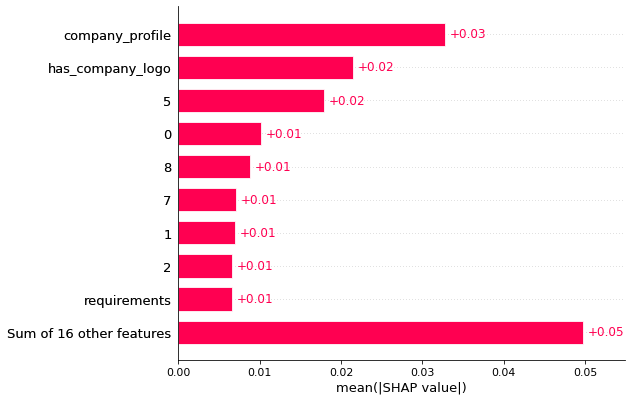

In [73]:
shap.plots.bar(shap_values)

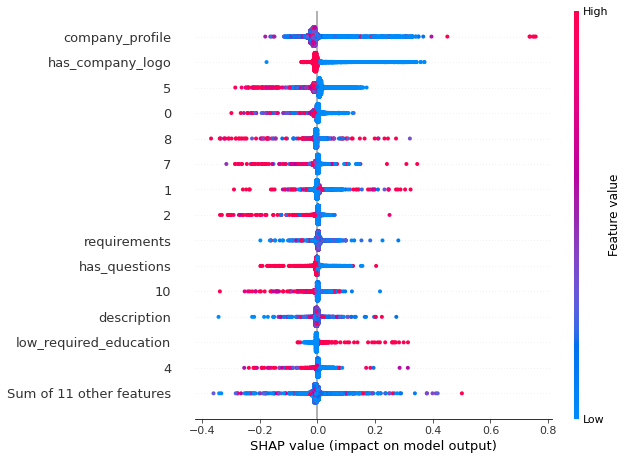

In [74]:
shap.plots.beeswarm(shap_values, max_display=15)

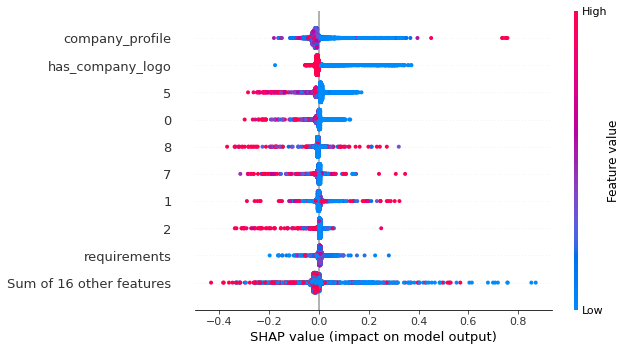

In [75]:
shap.plots.beeswarm(shap_values, max_display=10)

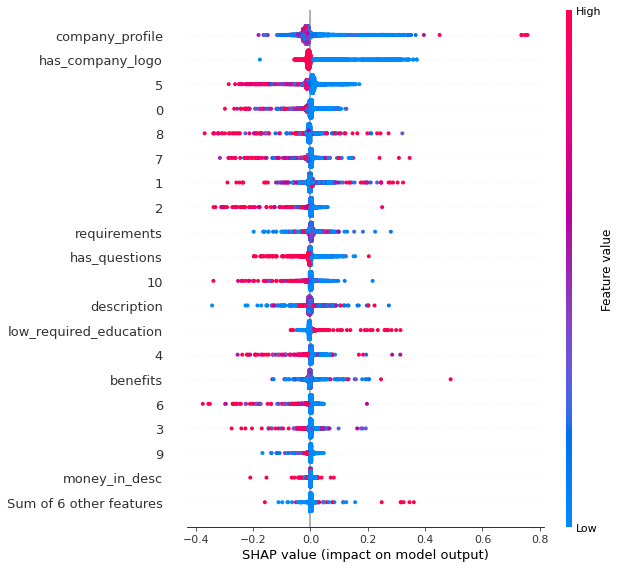

In [76]:
shap.plots.beeswarm(shap_values, max_display=20)